# Evidence of Discrimination?

The Department of Developmental Services (DDS) in California is responsible for allocating funds to support over 250,000 developmentally-disabled residents. The data set `ca_dds_expenditures.csv` contains data about 1,000 of these residents. The data comes from a discrimination lawsuit which alleged that California's Department of Developmental Services (DDS) privileged white (non-Hispanic) residents over Hispanic residents in allocating funds. We will focus on comparing the allocation of funds (i.e., expenditures) for these two ethnicities only, although there are other ethnicities in this data set.

There are 6 variables in this data set:

- Id:  5-digit, unique identification code for each consumer (similar to a social security number and used for identification purposes)  
- Age Cohort:  Binned age variable represented as six age cohorts (0-5, 6-12, 13-17, 18-21, 22-50, and 51+)
- Age:  Unbinned age variable
- Gender:  Male or Female
- Expenditures:  Dollar amount of annual expenditures spent on each consumer
- Ethnicity:  Eight ethnic groups (American Indian, Asian, Black, Hispanic, Multi-race, Native Hawaiian, Other, and White non-Hispanic)

# Question 1

Read in the data set. Make a graphic that compares the _average_ expenditures by the DDS on Hispanic residents and white (non-Hispanic) residents. Comment on what you see.

In [1]:
# YOUR CODE HERE
import pandas as pd

In [2]:
df = pd.read_csv('ca_dds_expenditures.csv')
df

,Id,Age Cohort,Age,Gender,Expenditures,Ethnicity
0,10210,13 to 17,17,Female,2113,White not Hispanic
1,10409,22 to 50,37,Male,41924,White not Hispanic
2,10486,0 to 5,3,Male,1454,Hispanic
3,10538,18 to 21,19,Female,6400,Hispanic
4,10568,13 to 17,13,Male,4412,White not Hispanic
...,...,...,...,...,...,...
995,99622,51+,86,Female,57055,White not Hispanic
996,99715,18 to 21,20,Male,7494,Hispanic
997,99718,13 to 17,17,Female,3673,Multi Race
998,99791,6 to 12,10,Male,3638,Hispanic


In [3]:
df.head()

,Id,Age Cohort,Age,Gender,Expenditures,Ethnicity
0,10210,13 to 17,17,Female,2113,White not Hispanic
1,10409,22 to 50,37,Male,41924,White not Hispanic
2,10486,0 to 5,3,Male,1454,Hispanic
3,10538,18 to 21,19,Female,6400,Hispanic
4,10568,13 to 17,13,Male,4412,White not Hispanic


In [4]:
table = pd.pivot_table(data=df, values='Expenditures',index='Ethnicity', aggfunc='mean')
table

,Expenditures
Ethnicity,
American Indian,36438.250000
Asian,18392.372093
Black,20884.593220
Hispanic,11065.569149
Multi Race,4456.730769
Native Hawaiian,42782.333333
Other,3316.500000
White not Hispanic,24697.548628


<Axes: xlabel='Ethnicity'>

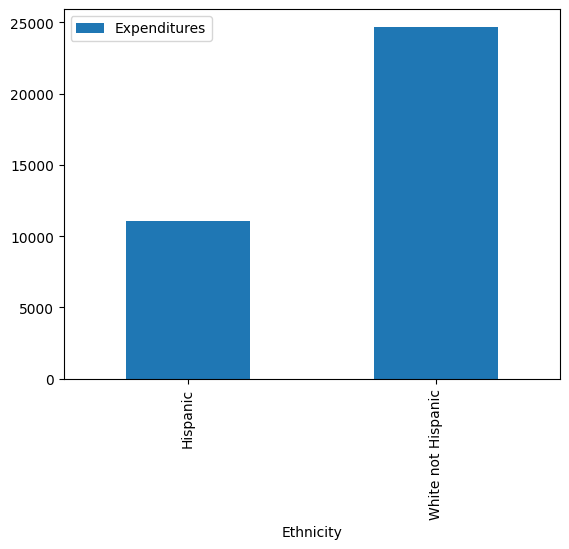

In [5]:
table.loc[['Hispanic', 'White not Hispanic']].plot(kind='bar')

**YOUR EXPLANATION HERE**

By the graph plot above, we can see that average expenditure by DDS on Hispanic residents is less than half than compared to white (non-Hispanic). By this observation, we can say that there is a kind of unfairness in this situation.


# Question 2

Now, calculate the average expenditures by ethnicity and age cohort. Make a graphic that compares the average expenditure on Hispanic residents and white (non-Hispanic) residents, _within each age cohort_. 

Comment on what you see. How do these results appear to contradict the results you obtained in Question 1?

In [6]:
# YOUR CODE HERE

index = ['Ethnicity', 'Age Cohort']

table2 = pd.pivot_table(data=df, values='Expenditures',index=index , aggfunc='mean')

table2

Expenditures
Ethnicity          Age Cohort              
American Indian    13 to 17     3726.000000
                   22 to 50    28205.000000
                   51+         56911.000000
Asian              0 to 5       1502.250000
                   13 to 17     3509.100000
                   18 to 21     9598.170732
                   22 to 50    39580.517241
                   51+         54622.615385
                   6 to 12      2164.555556
Black              0 to 5       1083.000000
                   13 to 17     4521.750000
                   18 to 21     8847.444444
                   22 to 50    40573.058824
                   51+         54010.142857
                   6 to 12      2476.454545
Hispanic           0 to 5       1393.204545
                   13 to 17     3955.281553
                   18 to 21     9959.846154
                   22 to 50    40924.116279
                   51+         55585.000000
                   6 to 12      2312.186813
Multi Race         0 to 5       1735.285714
                   13 to 17     3972.285714
                   18 to 21     9309.000000
                   22 to 50    38619.000000
                   6 to 12      2076.111111
Native Hawaiian    22 to 50    39103.000000
                   51+         50141.000000
Other              13 to 17     3316.500000
White not Hispanic 0 to 5       1366.900000
                   13 to 17     3904.358209
                   18 to 21    10133.057971
                   22 to 50    40187.624060
                   51+         52670.424242
                   6 to 12      2052.260870

In [7]:
# table2.loc[['Hispanic']].plot(kind='bar')
# table2.loc[['White not Hispanic']].plot(kind='bar')

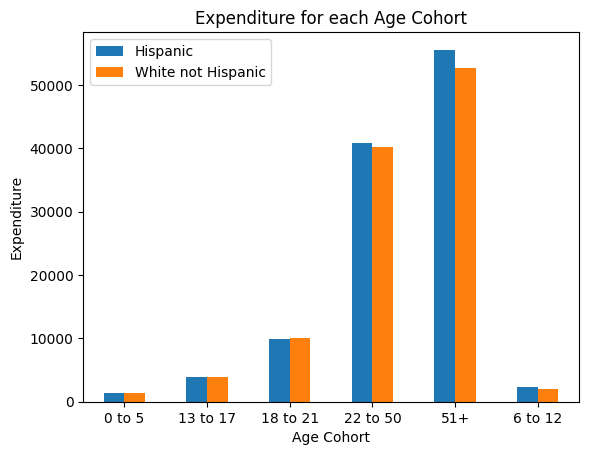

In [8]:
import matplotlib.pyplot as plt
table2 = table2.reset_index()

filtered_table = table2[table2['Ethnicity'].isin(['Hispanic', 'White not Hispanic'])]

ax = filtered_table.pivot(index='Age Cohort', columns='Ethnicity', values='Expenditures').plot(kind='bar')
plt.xlabel("Age Cohort")
plt.ylabel("Expenditure")
plt.title('Expenditure for each Age Cohort')
plt.xticks(rotation=0)
plt.legend(['Hispanic', 'White not Hispanic'])

plt.show()

**YOUR EXPLANATION HERE**


Based on the graph above we can see that the average expenditure on both Hispanic and white (not Hispanic) follow he same pattern for each age cohort. Also, we can see that in some age cohorts, expenditure in Hispanic is more than that of white. ( age 6 to 12 , 51+ etc).


Now, based on the graph we can see that it contradicts the observations we saw in Question1. Both Hispanic and White recieve similar average expenditure. 

# Question 3

Can you explain the discrepancy between the two analyses you conducted above (i.e., Questions 1 and 2)? Try to tell a complete story that interweaves tables, graphics, and explanation.

_Hint:_ You might want to consider looking at:

- the distributions of ages of Hispanics and whites
- the average expenditure as a function of age

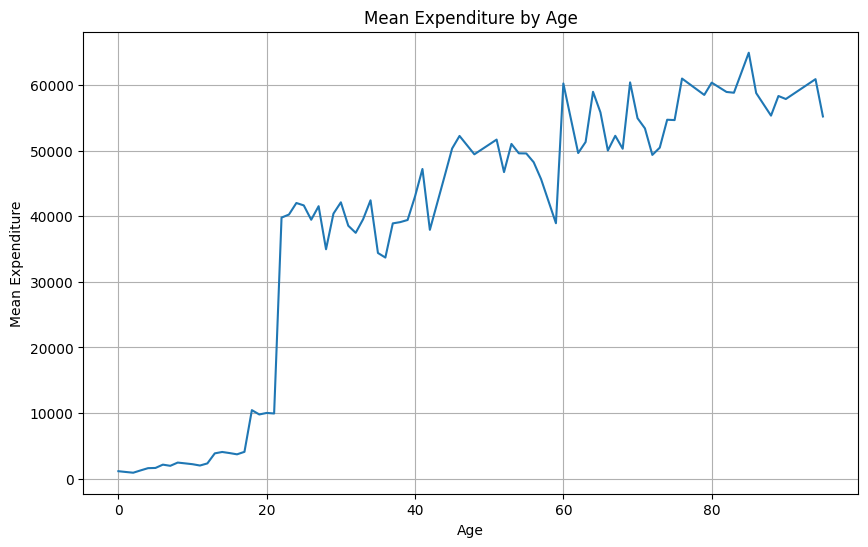

In [9]:
# YOUR CODE HERE (although you may want to add more code cells)

ethnicities = ['Hispanic', 'White not Hispanic']
filtered_data = df[df['Ethnicity'].isin(ethnicities)]


table3 = pd.pivot_table(filtered_data, values='Expenditures', index='Age', aggfunc='mean')

plt.figure(figsize=(10, 6))

# Plot the data as a line graph
plt.plot(table3.index, table3['Expenditures'])

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Mean Expenditure')
plt.title('Mean Expenditure by Age')

# Show the plot
plt.grid()
plt.show()

In [10]:
Hispanic_table=pd.pivot_table(data=df, values='Age',index=['Ethnicity', 'Age Cohort'],aggfunc='count').loc[['Hispanic']]

White_table=pd.pivot_table(data=df, values='Age',index=['Ethnicity', 'Age Cohort'],aggfunc='count').loc[['White not Hispanic']]

In [11]:
Hispanic_table

Age
Ethnicity Age Cohort     
Hispanic  0 to 5       44
          13 to 17    103
          18 to 21     78
          22 to 50     43
          51+          17
          6 to 12      91

In [12]:
White_table

Age
Ethnicity          Age Cohort     
White not Hispanic 0 to 5       20
                   13 to 17     67
                   18 to 21     69
                   22 to 50    133
                   51+          66
                   6 to 12      46

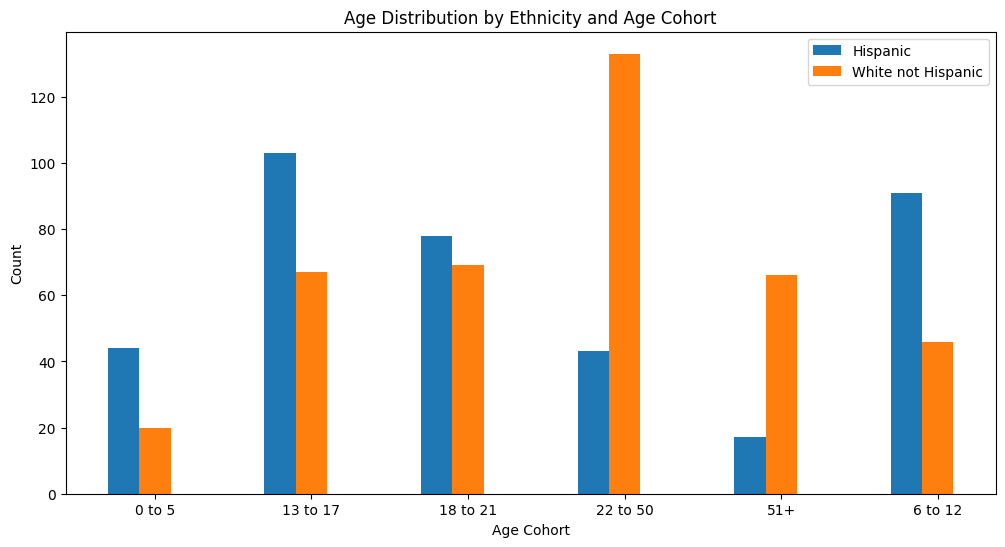

In [13]:
hispanic_data = Hispanic_table['Age']
white_data = White_table['Age']

x = range(len(hispanic_data))

num_bars = len(x)

bar_width = 0.2

plt.figure(figsize=(12, 6))
plt.bar(x, hispanic_data, label='Hispanic', width=bar_width)
plt.bar([i + bar_width for i in x], white_data, label='White not Hispanic', width=bar_width)

plt.xticks([i + bar_width for i in x], Hispanic_table.index.get_level_values('Age Cohort'))

plt.xlabel('Age Cohort')
plt.ylabel('Count')
plt.title('Age Distribution by Ethnicity and Age Cohort')
plt.legend()

plt.show()

**YOUR EXPLANATION HERE (although you may want to add more markdown cells)**

After plotting both the graphs, we can understand the reason why Question 1 contradicts Question 2.

***Observation from plot 'Mean Expenditure by Age':*** From this plot, we can see that mean expenditure get larger as the age group increases. Mean expenditure for age groups 50 and above is more than 50,000 as compared to children is age group less than 20 which is less than 20,000. This means that age plays significant role in expenditure.

***Observation from plot 'Age Distribution by Ethnicity and Age Cohort':*** From this plot, we can see that the young population i.e age groups less than 20 is more populated in Hispanic. Similarly the white not hispanic has more people in age groups greater than 20. Therfore expenditure is directly proportional to age.



Therefore from both the observations, we can see that hispanic having more younger population therefore has less expenditure and white not hispanic having more people in 20+ age cohorts have significantly higher expenditures. Therfore, this explains the discrepancy we faced in Question1 and Question 2.

## Submission Instructions

Once you are finished, follow these steps:

1. Restart the kernel and re-run this notebook from beginning to end by going to `Kernel > Restart Kernel and Run All Cells`.

2. If this process stops halfway through, that means there was an error. Correct the error and repeat Step 1 until the notebook runs from beginning to end.

3. Double check that there is a number next to each code cell and that these numbers are in order.

Then, submit your lab as follows:

1. Go to `File > Export Notebook As > PDF`.

2. Double check that the entire notebook, from beginning to end, is in this PDF file. (If the notebook is cut off, try first exporting the notebook to HTML and printing to PDF.)

3. Upload your Notebook (ipynb) to canvas (one submission per group).

4. Demo your lab.